In [26]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [27]:
mct_bboxes = np.array(
    [
        [1231, 375, 1294, 628],
        [1105, 347, 1169, 583],
        [1588, 459, 1710, 708],
        [844, 259, 913, 470],
        [426, 240, 484, 433],
        [579, 230, 641, 401],
        [707, 325, 851, 550],
        [640, 288, 704, 411],
        [818, 619, 969, 948],
        [473, 507, 584, 790],
        [701, 262, 778, 473],
        [291, 807, 410, 1078],
        [408, 547, 501, 840],
        [314, 610, 447, 843],
        [534, 361, 604, 592],
    ]
).astype(int)
sct_cam_09 = np.array(
   [[370, 375, 464, 611], [1131, 369, 1231, 600], [1231, 375, 1294, 628], [1105, 347, 1169, 583], [1588, 459, 1710, 708], [844, 259, 913, 470], [426, 240, 484, 433], [579, 230, 641, 401], [358, 331, 401, 462], [707, 325, 851, 550], [640, 288, 704, 411]]
)
sct_cam_10 = np.array(
   [[818, 619, 969, 948], [473, 507, 584, 790], [701, 262, 778, 473], [291, 807, 410, 1078], [408, 547, 501, 840], [314, 610, 447, 843], [534, 361, 604, 592]]
)

mct_bottom_right = mct_bboxes[:, 2:]
sct_cam_09_bottom_right = sct_cam_09[:, 2:]
sct_cam_10_bottom_right = sct_cam_10[:, 2:]

In [28]:
pos_dict = {
    "mct": {
        "bottom_right": mct_bottom_right,
        "track_ids": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        "cam_image_path": None,
        "map_image_path": "/home/jongphago/Share/projects/nota/maps/val/scene_042/map.png",
        "cam_points": None,
        "map_points": None,
        "H": None,
    },
    "cam_09": {
        "bottom_right": sct_cam_09_bottom_right,
        "track_ids": [10, 13, 1, 2, 3, 4, 5, 6, 15, 7, 8],
        "cam_image_path": "/home/jongphago/Share/projects/nota/videos/val/scene_042/camera09/cam.jpg",
        "map_image_path": "/home/jongphago/Share/projects/nota/maps/val/scene_042/map.png",
        "cam_points": [(1524, 436), (297, 337), (926, 822), (1038, 846)],
        "map_points": [(1026, 1011), (1690, 1008), (1197, 598), (1142, 597)],
        "H": [
            [-5.30670644e-02, -4.55029673e-02, 5.24799064e02],
            [1.26371462e-01, -3.19613084e-01, 3.64646678e02],
            [9.65788293e-05, 2.73151301e-05, 2.54243223e-01],
        ],
    },
    "cam_10": {
        "bottom_right": sct_cam_10_bottom_right,
        "track_ids": [9, 10, 11, 12, 13, 14, 15],
        "cam_image_path": "/home/jongphago/Share/projects/nota/videos/val/scene_042/camera10/cam.jpg",
        "map_image_path": "/home/jongphago/Share/projects/nota/maps/val/scene_042/map.png",
        "cam_points": [
            (183, 347),
            (36, 539),
            (1000, 891),
            (1326, 570),
            (896, 458),
            (671, 296),
        ],
        "map_points": [
            (648, 1008),
            (899, 1007),
            (1191, 644),
            (964, 479),
            (825, 652),
            (547, 756),
        ],
        "H": [
            [-7.98122062e-02, 5.29904149e00, -5.47726342e02],
            [-1.13426601e00, 2.12273565e00, 1.46769371e03],
            [-1.48855700e-04, 2.90156352e-03, 1.00000000e00],
        ],
    },
}

In [29]:
camera_index = 10
camera_id = f"cam_{camera_index:02}"
camera_info = pos_dict[camera_id]

bottom_right = camera_info["bottom_right"]
track_ids = camera_info["track_ids"]
cam_image_path = camera_info["cam_image_path"]
map_image_path = camera_info["map_image_path"]
cam_points = camera_info["cam_points"]
map_points = camera_info["map_points"]
H = camera_info["H"]
H = np.array(H) if isinstance(H, list) else H

In [30]:
_map_image = cv2.imread(map_image_path)
_cam_image = cv2.imread(cam_image_path)

In [31]:
# H, _ = cv2.findHomography(np.array(cam_points), np.array(map_points))

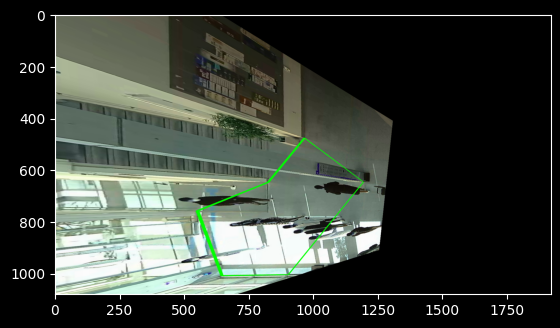

In [32]:
cam_image = _cam_image.copy()
cv2.polylines(cam_image, [np.array(cam_points)], True, (0, 255, 0), 5)
warped = cv2.warpPerspective(cam_image, H, (cam_image.shape[1], cam_image.shape[0]))
plt.imshow(warped)
plt.show()

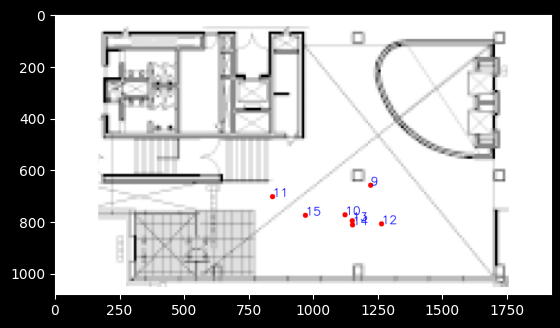

In [33]:
def perspective_transform(bm, homography):
    if isinstance(bm, np.ndarray):
        bm = bm.tolist()
    bmx, bmy = bm  # bottom-mid
    
    cam_point = np.array([[[bmx, bmy]]], dtype=np.float32)
    map_point = cv2.perspectiveTransform(cam_point, homography)
    world_x, world_y = map_point[0][0]
    return (int(world_x), int(world_y))


world_points = [perspective_transform(bm, H) for bm in bottom_right]
map_image = _map_image.copy()
for p, tid in zip(world_points, track_ids):
    cv2.circle(map_image, p, 10, (255, 0, 0), -1)
    cv2.putText(map_image, str(tid), p, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 2)
    
plt.imshow(map_image)
plt.show()